# Initial setup

In [365]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import os

In [366]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [367]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 1.0 Remove dodgy images

In [368]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [369]:
data_dir = 'data' 

In [370]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [371]:
os.listdir(data_dir)

['happy', 'sad']

In [372]:

# folder_path = os.path.join(data_dir,'happy')

# # Get the list of files in the folder
# files = os.listdir(folder_path)

# # Iterate over the files and delete those larger than 10 KB
# for image_class in os.listdir(data_dir):
#     for file in os.listdir(os.path.join(data_dir, image_class)):
#         file_path = os.path.join(data_dir, image_class, file)
#         if os.path.isfile(file_path) and os.path.getsize(file_path) > 10240:  # Check file size in bytes
#             try:
#                 os.remove(file_path)
#                 print(f"Deleted file: {file_path}")
#             except OSError as e:
#                 print(f"Error deleting file: {file_path}\n{str(e)}")

In [373]:
img = cv2.imread(os.path.join('data','happy', 'image3.jpeg'))

In [374]:
img.shape
#100x100 pixels, with 3 channels, which means its a colored image.

(100, 100, 3)

### 1.1 Display an image
not necesarry for ml, just for exorcise example, to show what cv2 does. 

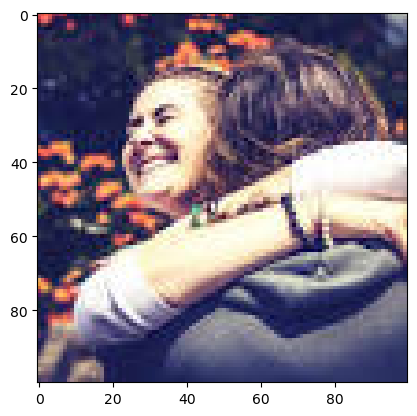

In [375]:
#Opencv reads an image as bgr, but matplot expects it to be rgb. 
# plt.imshow(img)
# Color fix: pass through a color conversion code, which reorders the channels
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [376]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### 1.3 Load Data

In [377]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [378]:
import numpy as np

#### 1.3.1
Keras can do a ton of useful stuff, with the data it can shuffle the data, create validation split, resize images etc. Docs can be seen blow.

In [379]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [380]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 139 files belonging to 2 classes.


In [381]:
data_itereator = data.as_numpy_iterator()

2023-07-12 19:39:56.134685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [139]
	 [[{{node Placeholder/_4}}]]
2023-07-12 19:39:56.134935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [139]
	 [[{{node Placeholder/_4}}]]


In [382]:
data_itereator

In [383]:
#Get another batch from the iterator
batch = data_itereator.next()

In [384]:
#Images represented as numpy arrays
batch[0].max()

255.0

In [385]:
#Class 1 = sad people :(
#Class 0 = Haappy people :)
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int32)

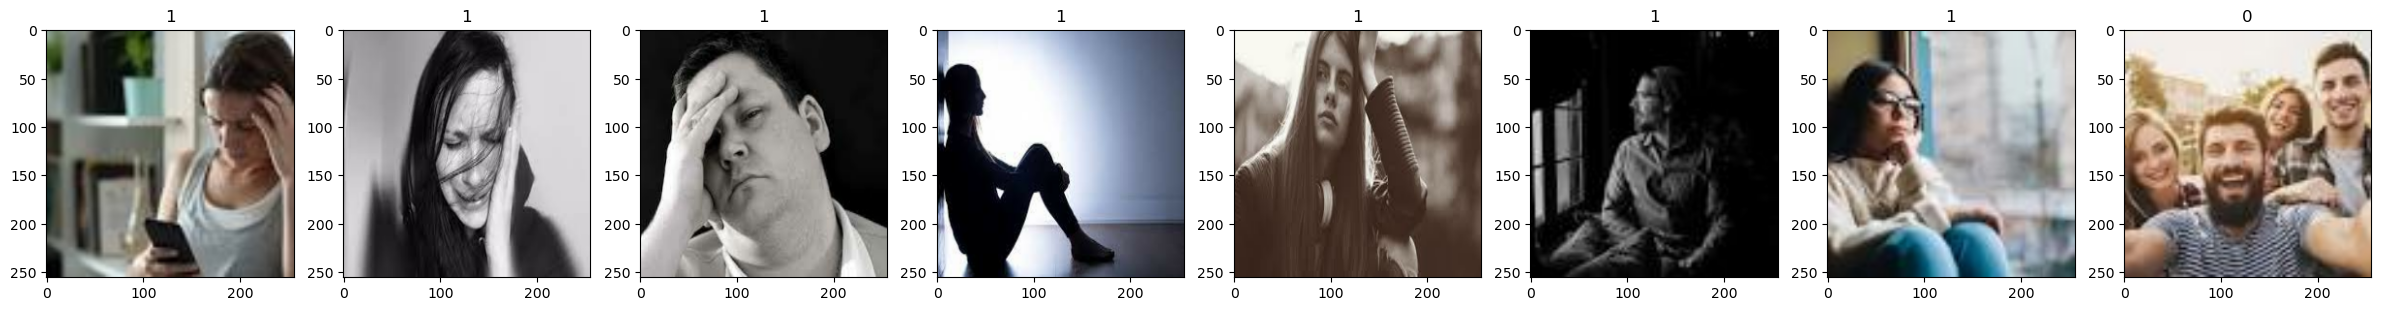

In [386]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2.0 Pr-Pposseing data
Data is now loaded in above. Now we got to start pre processing. For image data we tend to pre-process by scaling the image values to be between 0 and 1, instead of 0 to 225. This helps our deep learning model generalize faster, and produces better results.
We are also going to split up our data into training, testing and validation partitions, to ensure that we dont overfit. 

In [338]:
scaled = batch[0] / 255
scaled.max()

1.0

By dividing batch[0] by 255, you are effectively rescaling the pixel values to a normalized range. This operation ensures that the pixel values fall between 0 and 1, which can be beneficial for training certain machine learning models. Dette optimere eksempelvis:
* Gradient descent (kost funktionen)
* Activation function (Gør activations mere meningsfulde)

In [339]:
data = data.map(lambda x, y: (x / 255, y))

In [340]:
#Keras manages the shuffle, so we got different data each time, to prevent bias which might occour in the data, to make the data more randomized.
batch = data.as_numpy_iterator().next()

2023-07-12 19:38:08.363859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [139]
	 [[{{node Placeholder/_0}}]]
2023-07-12 19:38:08.364211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [139]
	 [[{{node Placeholder/_4}}]]


# 2.2 split data
Now we are splitting our data into training and testing partition. This helps when it comes to actually starting to validating our data, and ensuring that our model hasn't overfit.

In [341]:
len(data)

5

In [342]:
#Splitting our batches (got 5 total: len(data))

train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

# Validating the total data size with train, val, test, as the total is already 5 batches, the split should also be 5 total:
train_size+val_size+test_size

5

In [343]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [344]:
len(test)

1

# 3.0 Deep model

Now that our data has been pre-processed, we can begin modelling. What we are doing now, is building our deep learning model using the keras sequantial API.

### 3.1 Build Deep learning model

In [345]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [346]:
model = Sequential()

In [347]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Is using the sigmoid regression, which means the output will either be 0 or 1 which matches our happy og sad faces on images
model.add(Dense(1, activation='sigmoid'))

In [348]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [349]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

### 3.2 Train the model

In [350]:
logdir = 'logs'

In [351]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [352]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-07-12 19:38:08.659239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [139]
	 [[{{node Placeholder/_4}}]]
2023-07-12 19:38:08.659838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [139]
	 [[{{node Placeholder/_4}}]]


3/3 [==============================] - 2s 119ms/step - loss: 2.2113 - accuracy: 0.3750 - val_loss: 1.5427 - val_accuracy: 0.6250
Epoch 2/20


2023-07-12 19:38:10.464726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [139]
	 [[{{node Placeholder/_0}}]]
2023-07-12 19:38:10.465063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [139]
	 [[{{node Placeholder/_4}}]]


3/3 [==============================] - 0s 87ms/step - loss: 1.4477 - accuracy: 0.5833 - val_loss: 0.6958 - val_accuracy: 0.6562
Epoch 3/20
3/3 [==============================] - 0s 77ms/step - loss: 0.6936 - accuracy: 0.6562 - val_loss: 0.6368 - val_accuracy: 0.6562
Epoch 4/20
3/3 [==============================] - 0s 81ms/step - loss: 0.6705 - accuracy: 0.6250 - val_loss: 0.6332 - val_accuracy: 0.6562
Epoch 5/20
3/3 [==============================] - 0s 78ms/step - loss: 0.6647 - accuracy: 0.6042 - val_loss: 0.6619 - val_accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 0s 77ms/step - loss: 0.6267 - accuracy: 0.6979 - val_loss: 0.5873 - val_accuracy: 0.7188
Epoch 7/20
3/3 [==============================] - 0s 86ms/step - loss: 0.5983 - accuracy: 0.6042 - val_loss: 0.5596 - val_accuracy: 0.7500
Epoch 8/20
3/3 [==============================] - 0s 87ms/step - loss: 0.5387 - accuracy: 0.7500 - val_loss: 0.5086 - val_accuracy: 0.9062
Epoch 9/20
3/3 [======================

### 3.3 Plot Performance

In [353]:
hist.history

{'loss': [2.211343288421631,
  1.4476691484451294,
  0.6935647130012512,
  0.6705494523048401,
  0.6646931171417236,
  0.6266512274742126,
  0.5982978940010071,
  0.5387322306632996,
  0.5229431986808777,
  0.4450894892215729,
  0.3811782896518707,
  0.27289271354675293,
  0.28486955165863037,
  0.2540706694126129,
  0.1823974996805191,
  0.14104117453098297,
  0.10775956511497498,
  0.09410116821527481,
  0.0854232907295227,
  0.04522320628166199],
 'accuracy': [0.375,
  0.5833333134651184,
  0.65625,
  0.625,
  0.6041666865348816,
  0.6979166865348816,
  0.6041666865348816,
  0.75,
  0.8020833134651184,
  0.7916666865348816,
  0.8645833134651184,
  0.9375,
  0.8958333134651184,
  0.90625,
  0.96875,
  0.9791666865348816,
  0.9895833134651184,
  0.96875,
  0.9791666865348816,
  0.9895833134651184],
 'val_loss': [1.5426506996154785,
  0.6957762241363525,
  0.6368160843849182,
  0.6332168579101562,
  0.6618742942810059,
  0.5873106122016907,
  0.5595912933349609,
  0.5085765719413757,
 

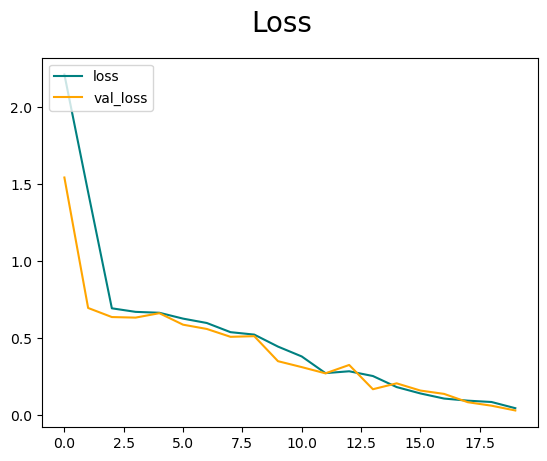

In [354]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

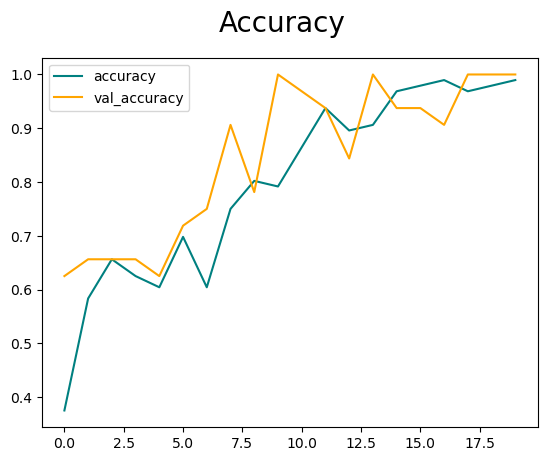

In [355]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4.0 Evaluate Performance
After finished training the model, it is time to test it out. There's a few different metrics we'll use for classification: Precesion, Recall and Accuracy.  

### 4.1 Evaluate

In [356]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [357]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [358]:
# Unpacking our batch, in this case test batch.
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

# yhat, often represented as ŷ = predicted value

1/1 [==============================] - 0s 72ms/step


2023-07-12 19:38:15.799803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [139]
	 [[{{node Placeholder/_4}}]]
2023-07-12 19:38:15.800152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [139]
	 [[{{node Placeholder/_4}}]]


In [359]:
print(f"Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


### 4.2 Test

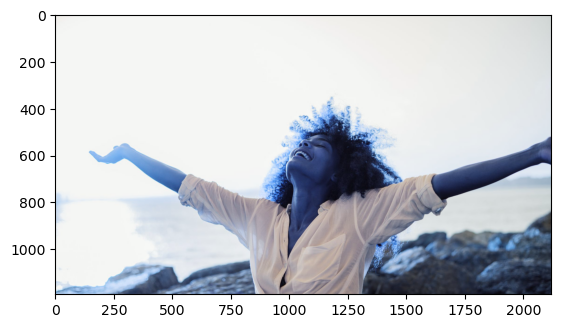

In [360]:
img = cv2.imread('happy.jpg')
plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

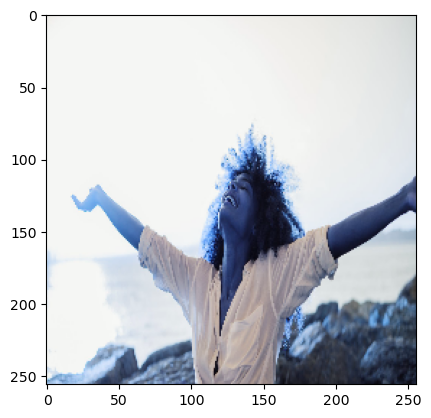

In [361]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

Our neural network expects us to pass through a batch of images, not a single image. So we need to encapsulate it inside of another set of parantheses, a list or arrays. So in order to do this, is we can type in the following, to push it into another numpy array: 

In [362]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [363]:
yhat

array([[0.9644212]], dtype=float32)